GOGREEN Data Analysis (I am sorry for how bad this code looks)

In [1]:
# importing libraries, grabbed from other code in file

# make notebook span width of browser window, for convenience
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
np.warnings.filterwarnings('ignore')

# for graphing
import seaborn as sns #(for graphing)

# import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
# for jupyter notebooks to show plots inline
%matplotlib inline 
#%matplotlib

from astropy.table import Table
from astropy.io import fits, ascii
from astropy import units as u
from astropy.coordinates import SkyCoord


# For pandas tables
import pandas as pd 
import astropy
pd.set_option('display.max_columns', 500) # convenient for 

In [2]:
# define cosmology
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3)

In [3]:
# define paths, using windows pathing

version = "\DR1"
root = r"C:\Users\jblan\Documents\College work\Sem 7\Labs"
#root = '/Users/mbalogh/projects/GOGREEN/data/Data/Releases/'
dirr  =  root + version + "\\"
specdir = dirr + "SPECTROSCOPY\\"
catdir = dirr + "CATS\\"
photdir = dirr + "PHOTOMETRY\\"
imdir = photdir + "IMAGES\\"
oneddir = specdir + "OneD\\"
twoddir = specdir + "TwoD\\"

The following few cells are importing the photo table along with converting values

In [4]:
#Setting the location
photo = catdir + "Photo.fits"

# read in fits data table and immediately convert to pandas Dataframe
photo_table = Table(fits.getdata(photo)).to_pandas() 

#Print column names along with the actual table
print(photo_table.columns)
photo_table

Index(['Cluster', 'cPHOTID', 'SPECID', 'ra', 'dec', 'zspec',
       'Redshift_Quality', 'zphot', 'zphot_l68', 'zphot_u68', 'UMINV', 'VMINJ',
       'Star', 'K_flag', 'totmask', 'Mstellar', 'u_tot', 'g_tot', 'r_tot',
       'i_tot', 'z_tot', 'y_tot', 'V_tot', 'B_tot', 'J_tot', 'H_tot', 'K_tot',
       'Ks_tot', 'IRAC1_tot', 'IRAC2_tot', 'IRAC3_tot', 'IRAC4_tot',
       'IA484_tot', 'IA527_tot', 'IA624_tot', 'IA679_tot', 'IA738_tot',
       'IA767_tot', 'IB427_tot', 'IB464_tot', 'IB505_tot', 'IB574_tot',
       'IB709_tot', 'IB827_tot', 'fuv_tot', 'nuv_tot', 'mips24_tot', 'eu_tot',
       'eg_tot', 'er_tot', 'ei_tot', 'ez_tot', 'ey_tot', 'eV_tot', 'eB_tot',
       'eJ_tot', 'eH_tot', 'eK_tot', 'eKs_tot', 'eIRAC1_tot', 'eIRAC2_tot',
       'eIRAC3_tot', 'eIRAC4_tot', 'eIA484_tot', 'eIA527_tot', 'eIA624_tot',
       'eIA679_tot', 'eIA738_tot', 'eIA767_tot', 'eIB427_tot', 'eIB464_tot',
       'eIB505_tot', 'eIB574_tot', 'eIB709_tot', 'eIB827_tot', 'efuv_tot',
       'enuv_tot', 'emips24_tot

,Cluster,cPHOTID,SPECID,ra,dec,zspec,Redshift_Quality,zphot,zphot_l68,zphot_u68,UMINV,VMINJ,Star,K_flag,totmask,Mstellar,u_tot,g_tot,r_tot,i_tot,z_tot,y_tot,V_tot,B_tot,J_tot,H_tot,K_tot,Ks_tot,IRAC1_tot,IRAC2_tot,IRAC3_tot,IRAC4_tot,IA484_tot,IA527_tot,IA624_tot,IA679_tot,IA738_tot,IA767_tot,IB427_tot,IB464_tot,IB505_tot,IB574_tot,IB709_tot,IB827_tot,fuv_tot,nuv_tot,mips24_tot,eu_tot,eg_tot,er_tot,ei_tot,ez_tot,ey_tot,eV_tot,eB_tot,eJ_tot,eH_tot,eK_tot,eKs_tot,eIRAC1_tot,eIRAC2_tot,eIRAC3_tot,eIRAC4_tot,eIA484_tot,eIA527_tot,eIA624_tot,eIA679_tot,eIA738_tot,eIA767_tot,eIB427_tot,eIB464_tot,eIB505_tot,eIB574_tot,eIB709_tot,eIB827_tot,efuv_tot,enuv_tot,emips24_tot
0,SPT0205,101000254,-1,31.576448,-58.548923,NaN,NaN,0.6916,0.653,0.735,1.631000,1.123000,0.0,0.0,0.0,9.549926e+10,5.958668,NaN,66.154896,147.931970,165.775268,NaN,NaN,NaN,267.857604,NaN,NaN,535.962,NaN,366.660295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344913,NaN,0.639278,0.975271,2.937707,NaN,NaN,NaN,1.564002,NaN,NaN,1.421279,NaN,1.795926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SPT0205,101000272,-1,31.449797,-58.548134,NaN,NaN,0.2460,0.225,0.268,1.058000,0.518000,0.0,0.0,0.0,1.949845e+09,26.485655,NaN,109.153539,137.253523,139.961813,NaN,NaN,NaN,161.805530,NaN,NaN,211.424,NaN,68.881033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.342971,NaN,0.549937,0.697769,2.105134,NaN,NaN,NaN,1.581807,NaN,NaN,1.425104,NaN,4.807510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SPT0205,101000286,-1,31.382263,-58.548920,NaN,NaN,1.1126,1.055,1.172,1.959000,1.431000,0.0,0.0,0.0,7.079458e+10,0.347850,NaN,2.346008,7.043954,11.977094,NaN,NaN,NaN,29.401196,NaN,NaN,79.369,NaN,89.288643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229265,NaN,0.365637,0.466435,1.403257,NaN,NaN,NaN,1.047502,NaN,NaN,0.950657,NaN,1.308389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPT0205,101000290,-1,31.419193,-58.548588,NaN,NaN,0.5563,0.518,0.604,1.838000,1.000000,0.0,0.0,0.0,5.128614e+09,0.186325,NaN,7.973411,15.262561,18.372256,NaN,NaN,NaN,25.104038,NaN,NaN,43.555,NaN,21.584750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186325,NaN,0.387106,0.379074,1.142042,NaN,NaN,NaN,0.851311,NaN,NaN,0.774211,NaN,2.001384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SPT0205,101000293,-1,31.528271,-58.548615,NaN,NaN,0.7379,0.664,0.804,1.746000,1.177000,0.0,0.0,0.0,2.691535e+10,1.380357,NaN,9.289432,25.285337,35.018064,NaN,NaN,NaN,48.905029,NaN,NaN,101.442,NaN,58.054011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254565,NaN,0.405987,0.721999,2.172582,NaN,NaN,NaN,1.781956,NaN,NaN,1.235519,NaN,0.906340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274987,SpARCS1613,219005807,-1,243.386673,56.895893,NaN,NaN,1.7280,1.348,2.167,1.354987,1.786097,0.0,0.0,0.0,5.754399e+10,0.045614,0.176507,0.251870,0.620750,-0.051564,NaN,NaN,NaN,1.705576,NaN,NaN,11.588,28.556497,31.360781,14.281223,2.177584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.128910,0.083296,0.146759,0.269719,0.517622,NaN,NaN,NaN,1.092759,NaN,NaN,1.596498,3.187047,3.621374,7.445037,10.241388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274988,SpARCS1613,219005808,-1,243.300598,56.903133,NaN,NaN,2.0858,1.912,2.253,1.508841,1.024443,0.0,0.0,0.0,2.290868e+11,0.779377,1.049773,2.088185,2.690327,3.658300,NaN,NaN,NaN,16.450987,NaN,NaN,56.740,91.521113,NaN,134.423197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.147695,0.095434,0.168145,0.320385,0.758927,NaN,NaN,

In [5]:
#Converting values to mag values

#changing Kband into Kband magnitude
photo_table["Ks_tot"] = ((-2.5*np.log10(photo_table["Ks_tot"]))+25)
photo_table

#Turning Mstellar into logMstellar (for much later)
photo_table["Mstellar"] = (np.log10(photo_table["Mstellar"]))
photo_table

,Cluster,cPHOTID,SPECID,ra,dec,zspec,Redshift_Quality,zphot,zphot_l68,zphot_u68,UMINV,VMINJ,Star,K_flag,totmask,Mstellar,u_tot,g_tot,r_tot,i_tot,z_tot,y_tot,V_tot,B_tot,J_tot,H_tot,K_tot,Ks_tot,IRAC1_tot,IRAC2_tot,IRAC3_tot,IRAC4_tot,IA484_tot,IA527_tot,IA624_tot,IA679_tot,IA738_tot,IA767_tot,IB427_tot,IB464_tot,IB505_tot,IB574_tot,IB709_tot,IB827_tot,fuv_tot,nuv_tot,mips24_tot,eu_tot,eg_tot,er_tot,ei_tot,ez_tot,ey_tot,eV_tot,eB_tot,eJ_tot,eH_tot,eK_tot,eKs_tot,eIRAC1_tot,eIRAC2_tot,eIRAC3_tot,eIRAC4_tot,eIA484_tot,eIA527_tot,eIA624_tot,eIA679_tot,eIA738_tot,eIA767_tot,eIB427_tot,eIB464_tot,eIB505_tot,eIB574_tot,eIB709_tot,eIB827_tot,efuv_tot,enuv_tot,emips24_tot
0,SPT0205,101000254,-1,31.576448,-58.548923,NaN,NaN,0.6916,0.653,0.735,1.631000,1.123000,0.0,0.0,0.0,10.98,5.958668,NaN,66.154896,147.931970,165.775268,NaN,NaN,NaN,267.857604,NaN,NaN,18.177165,NaN,366.660295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344913,NaN,0.639278,0.975271,2.937707,NaN,NaN,NaN,1.564002,NaN,NaN,1.421279,NaN,1.795926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SPT0205,101000272,-1,31.449797,-58.548134,NaN,NaN,0.2460,0.225,0.268,1.058000,0.518000,0.0,0.0,0.0,9.29,26.485655,NaN,109.153539,137.253523,139.961813,NaN,NaN,NaN,161.805530,NaN,NaN,19.187114,NaN,68.881033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.342971,NaN,0.549937,0.697769,2.105134,NaN,NaN,NaN,1.581807,NaN,NaN,1.425104,NaN,4.807510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SPT0205,101000286,-1,31.382263,-58.548920,NaN,NaN,1.1126,1.055,1.172,1.959000,1.431000,0.0,0.0,0.0,10.85,0.347850,NaN,2.346008,7.043954,11.977094,NaN,NaN,NaN,29.401196,NaN,NaN,20.250873,NaN,89.288643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229265,NaN,0.365637,0.466435,1.403257,NaN,NaN,NaN,1.047502,NaN,NaN,0.950657,NaN,1.308389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPT0205,101000290,-1,31.419193,-58.548588,NaN,NaN,0.5563,0.518,0.604,1.838000,1.000000,0.0,0.0,0.0,9.71,0.186325,NaN,7.973411,15.262561,18.372256,NaN,NaN,NaN,25.104038,NaN,NaN,20.902405,NaN,21.584750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186325,NaN,0.387106,0.379074,1.142042,NaN,NaN,NaN,0.851311,NaN,NaN,0.774211,NaN,2.001384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SPT0205,101000293,-1,31.528271,-58.548615,NaN,NaN,0.7379,0.664,0.804,1.746000,1.177000,0.0,0.0,0.0,10.43,1.380357,NaN,9.289432,25.285337,35.018064,NaN,NaN,NaN,48.905029,NaN,NaN,19.984455,NaN,58.054011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254565,NaN,0.405987,0.721999,2.172582,NaN,NaN,NaN,1.781956,NaN,NaN,1.235519,NaN,0.906340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274987,SpARCS1613,219005807,-1,243.386673,56.895893,NaN,NaN,1.7280,1.348,2.167,1.354987,1.786097,0.0,0.0,0.0,10.76,0.045614,0.176507,0.251870,0.620750,-0.051564,NaN,NaN,NaN,1.705576,NaN,NaN,22.339979,28.556497,31.360781,14.281223,2.177584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.128910,0.083296,0.146759,0.269719,0.517622,NaN,NaN,NaN,1.092759,NaN,NaN,1.596498,3.187047,3.621374,7.445037,10.241388,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
274988,SpARCS1613,219005808,-1,243.300598,56.903133,NaN,NaN,2.0858,1.912,2.253,1.508841,1.024443,0.0,0.0,0.0,11.36,0.779377,1.049773,2.088185,2.690327,3.658300,NaN,NaN,NaN,16.450987,NaN,NaN,20.615277,91.521113,NaN,134.423197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.147695,0.095434,0.168145,0.320385,0.758927,NaN,NaN,NaN,1.263363,NaN,NaN,2.072279,9.2

Kband magnitude histograms

<AxesSubplot:xlabel='Ks_tot', ylabel='Density'>

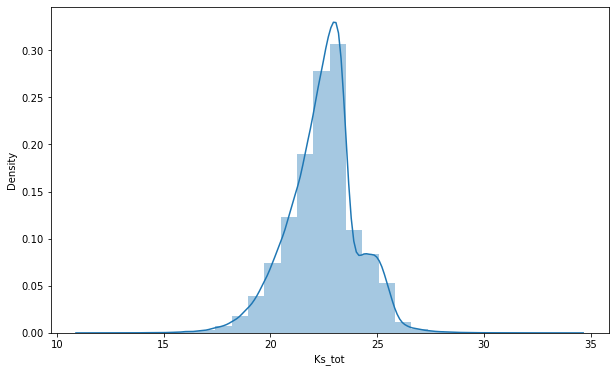

In [6]:
#Histogram of kband mag values. The y axis is a percentage distibution. 

#There are inf values in this table so by limiting the values this way, it will allow for a readable graph
photo_graphable = photo_table[photo_table["Ks_tot"] < 200]
photo_graphable2 = photo_graphable[photo_table["Ks_tot"] > 0]

#Graph code
plt.figure(figsize=(10,6)) 
sns.distplot(photo_graphable2['Ks_tot'], bins=30)

<AxesSubplot:xlabel='Ks_tot'>

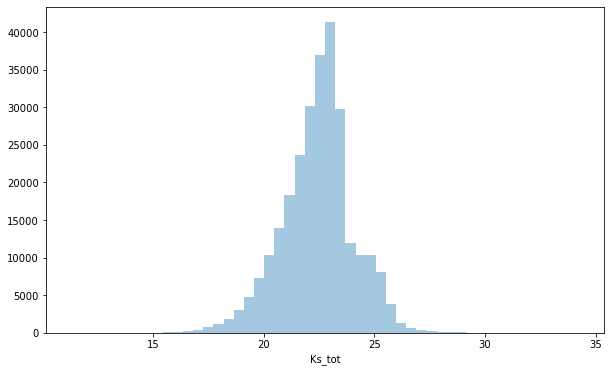

In [7]:
#Additional graph at higher bin count. Additionally, removing the kde line and changing y axis to number of values (rather than percentage) 
plt.figure(figsize=(10,6)) 
sns.distplot(photo_graphable2['Ks_tot'], bins=50, kde=False)

Reading in the structcat matched for 2106/showing re distribution. In order to get this table to read correctly in pandas, I had to read it in excel due to formating problems.
Note: re is in units of arcsec

In [8]:
#Reading in table for 2106

#Setting the pathway and reading it straight to a pandas table
data2106 = pd.read_excel(r"C:\Users\jblan\Documents\College work\Sem 7\Labs\DR1\STRUCTCAT_MATCHED\structcat_photmatch_spt2106.dat.xlsx")

#printing the table
data2106

,PHOTCATID,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,1,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1,2,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2,3,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
3,4,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
4,5,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,2919,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2919,2920,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2920,2921,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2921,2922,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0


<AxesSubplot:xlabel='re', ylabel='Density'>

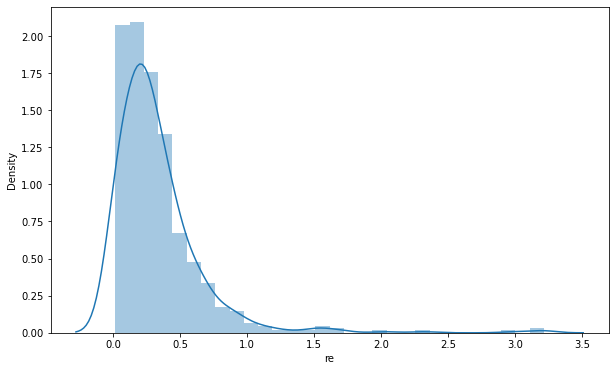

In [9]:
#Graphing Re as a histogram

#As no radius can be negative:
graphing2106 = data2106[data2106["re"] > 0]

#Another seaborn histogram, y axis in density
plt.figure(figsize=(10,6))
sns.distplot(graphing2106['re'], bins=30)

<AxesSubplot:xlabel='re'>

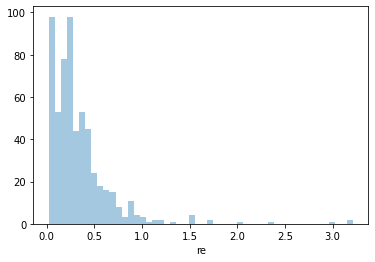

In [10]:
#Additional graph at higher bin count and no kde (so y aixs is in values)
#plt.figure(figsize=(10,6)) 
sns.distplot(graphing2106['re'], bins=50, kde=False)

The following few cells are creating a library to know what to add to each cluster to match the cphotid and photcatid

In [11]:
#All of the unique clusters in the cat

#This cell lets me know all the unique clusters within this data set, so I can specifically grab any cluster by name
clusdf = photo_table[['Cluster']]
clusdf.drop_duplicates("Cluster") 

,Cluster
0,SPT0205
1864,SPT0546
4439,SPT2106
6091,SpARCS0035
8934,SpARCS0219
10441,SpARCS0335
11257,SpARCS1034
19786,SpARCS1051
29674,SpARCS1616
36827,SpARCS1634


In [12]:
#The completed library of what to add to change photcatid to cphotid
#Note:double check cosmos-221, may be incorrect 

#This is a very inefficient way of doing this, but this is what is added to the different clusters to make their photcatid and cphot numbers the same
cphot_conversion = [("SPT0205","101000000"),("SPT0546","102000000"),("SPT2106","103000000"),("SpARCS0035","104000000"),("SpARCS0219","105000000"),("SpARCS0335","106000000"),("SpARCS1034","108000000"),("SpARCS1051","109000000"),
                    ("SpARCS1616","110000000"),("SpARCS1634","111000000"),("SpARCS1638","112000000"),("COSMOS","13000000"),("COSMOS-63","13000000"),("COSMOS-28","13000000"),("COSMOS-125","13000000"),("COSMOS-221","13000000"),
                    ("SXDF","414000000"),("SXDF76","414000000"),("SXDF49","414000000"),("SXDF64","414000000"),("SpARCS0034","215000000"),("SpARCS0036","216000000"),("SpARCS0215","217000000"),("SpARCS1047","218000000"),("SpARCS1613","219000000")]

#Printing the data frame
pd.DataFrame(cphot_conversion,columns=['Cluster','Conversion Number'])

,Cluster,Conversion Number
0,SPT0205,101000000
1,SPT0546,102000000
2,SPT2106,103000000
3,SpARCS0035,104000000
4,SpARCS0219,105000000
5,SpARCS0335,106000000
6,SpARCS1034,108000000
7,SpARCS1051,109000000
8,SpARCS1616,110000000
9,SpARCS1634,111000000


Adding the structcat 2106 table to the photo table + re/kband mag scatterplot

In [13]:
#Beginning the process of adding 2106 to the photo cat

#renaming the column head so I can invoke the replace under same column name
data2106.rename(columns={'PHOTCATID': 'cPHOTID'}, inplace=True)

#changing the value of photcatid to match cphotid
data2106["cPHOTID"] = (data2106["cPHOTID"] + 103000000)

data2106

,cPHOTID,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,103000001,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1,103000002,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2,103000003,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
3,103000004,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
4,103000005,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2918,103002919,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2919,103002920,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2920,103002921,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2921,103002922,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0


In [14]:
#Second cell of adding 2106 to the photo cat (renamed to combination)

#combining the datatables on cPHOTID column
combination = pd.merge(photo_table, data2106, how='left', on='cPHOTID')

#Print combo table
combination

,Cluster,cPHOTID,SPECID,ra,dec,zspec,Redshift_Quality,zphot,zphot_l68,zphot_u68,UMINV,VMINJ,Star,K_flag,totmask,Mstellar,u_tot,g_tot,r_tot,i_tot,z_tot,y_tot,V_tot,B_tot,J_tot,H_tot,K_tot,Ks_tot,IRAC1_tot,IRAC2_tot,IRAC3_tot,IRAC4_tot,IA484_tot,IA527_tot,IA624_tot,IA679_tot,IA738_tot,IA767_tot,IB427_tot,IB464_tot,IB505_tot,IB574_tot,IB709_tot,IB827_tot,fuv_tot,nuv_tot,mips24_tot,eu_tot,eg_tot,er_tot,ei_tot,ez_tot,ey_tot,eV_tot,eB_tot,eJ_tot,eH_tot,eK_tot,eKs_tot,eIRAC1_tot,eIRAC2_tot,eIRAC3_tot,eIRAC4_tot,eIA484_tot,eIA527_tot,eIA624_tot,eIA679_tot,eIA738_tot,eIA767_tot,eIB427_tot,eIB464_tot,eIB505_tot,eIB574_tot,eIB709_tot,eIB827_tot,efuv_tot,enuv_tot,emips24_tot,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,SPT0205,101000254,-1,31.576448,-58.548923,NaN,NaN,0.6916,0.653,0.735,1.631000,1.123000,0.0,0.0,0.0,10.98,5.958668,NaN,66.154896,147.931970,165.775268,NaN,NaN,NaN,267.857604,NaN,NaN,18.177165,NaN,366.660295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344913,NaN,0.639278,0.975271,2.937707,NaN,NaN,NaN,1.564002,NaN,NaN,1.421279,NaN,1.795926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,SPT0205,101000272,-1,31.449797,-58.548134,NaN,NaN,0.2460,0.225,0.268,1.058000,0.518000,0.0,0.0,0.0,9.29,26.485655,NaN,109.153539,137.253523,139.961813,NaN,NaN,NaN,161.805530,NaN,NaN,19.187114,NaN,68.881033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.342971,NaN,0.549937,0.697769,2.105134,NaN,NaN,NaN,1.581807,NaN,NaN,1.425104,NaN,4.807510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SPT0205,101000286,-1,31.382263,-58.548920,NaN,NaN,1.1126,1.055,1.172,1.959000,1.431000,0.0,0.0,0.0,10.85,0.347850,NaN,2.346008,7.043954,11.977094,NaN,NaN,NaN,29.401196,NaN,NaN,20.250873,NaN,89.288643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229265,NaN,0.365637,0.466435,1.403257,NaN,NaN,NaN,1.047502,NaN,NaN,0.950657,NaN,1.308389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SPT0205,101000290,-1,31.419193,-58.548588,NaN,NaN,0.5563,0.518,0.604,1.838000,1.000000,0.0,0.0,0.0,9.71,0.186325,NaN,7.973411,15.262561,18.372256,NaN,NaN,NaN,25.104038,NaN,NaN,20.902405,NaN,21.584750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186325,NaN,0.387106,0.379074,1.142042,NaN,NaN,NaN,0.851311,NaN,NaN,0.774211,NaN,2.001384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SPT0205,101000293,-1,31.528271,-58.548615,NaN,NaN,0.7379,0.664,0.804,1.746000,1.177000,0.0,0.0,0.0,10.43,1.380357,NaN,9.289432,25.285337,35.018064,NaN,NaN,NaN,48.905029,NaN,NaN,19.984455,NaN,58.054011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254565,NaN,0.405987,0.721999,2.172582,NaN,NaN,NaN,1.781956,NaN,NaN,1.235519,NaN,0.906340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274987,SpARCS1613,219005807,-1,243.386673,56.895893,NaN,NaN,1.7280,1.348,2.167,1.354987,1.786097,0.0,0.0,0.0,10.76,0.045614,0.176507,0.251870,0.620750,-0.051564,NaN,NaN,NaN,1.705576,NaN,NaN,22.339979,28.556497,31.360781,14.281223,2.177584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.128910,0.083296,0.146759,0.269719,0.517622,NaN,NaN,NaN,1.092759,NaN,NaN,1.596

(0.0, 4.5)

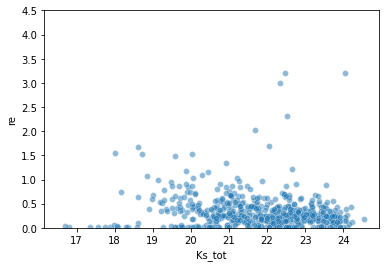

In [15]:
#Using the combined photo table, plotting Re and Kmag of the 2106 cluster

#I/someone needs to limit the data points to ones with good data (i.e. fit flag=3, S/N > 20, redshift quality=3 or 4, etc.)

#using seaborn to plot scatterplot.
g = sns.scatterplot(x='Ks_tot', y='re', data=combination, alpha=0.5)
#Set y limit at 0, as no Re data can exist below 0
g.set_ylim(0,4.5)

A series of histograms looking at redshifts. Look in notes in the cell to see which ones they are for

(-0.5176156628430333, 2.5)

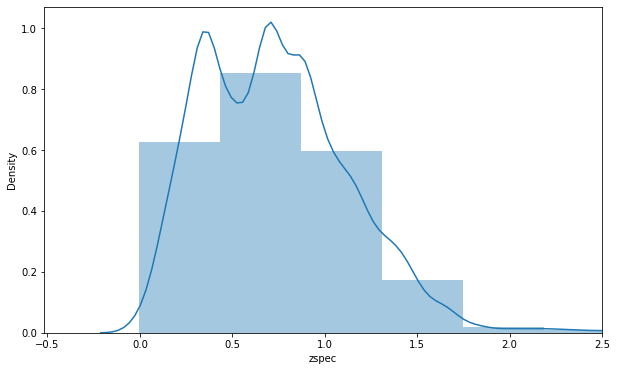

In [16]:
#Series of redshift histograms

#Plotting distribution for redshift for whole cat- spec ONLY
plt.figure(figsize=(10,6)) 
w = sns.distplot(photo_table['zspec'], bins=13)
w.set_xlim(None,2.5)

(-0.2920865, 2.5)

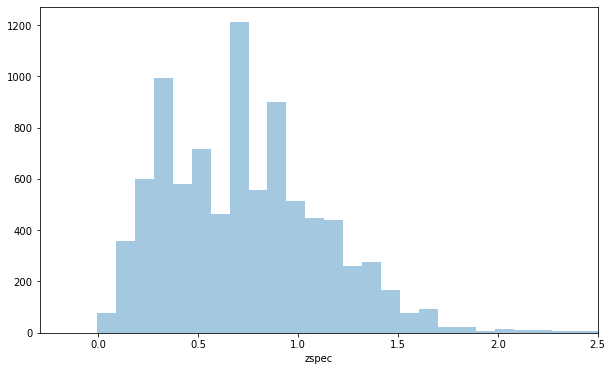

In [17]:
#Plotting distribution for redshift for whole cat- spec ONLY (higher bin count and no kde/values instead of density)
plt.figure(figsize=(10,6)) 
q = sns.distplot(photo_table['zspec'], bins=60, kde=False)
q.set_xlim(None,2.5)

(-0.4573533598754975, 3.5)

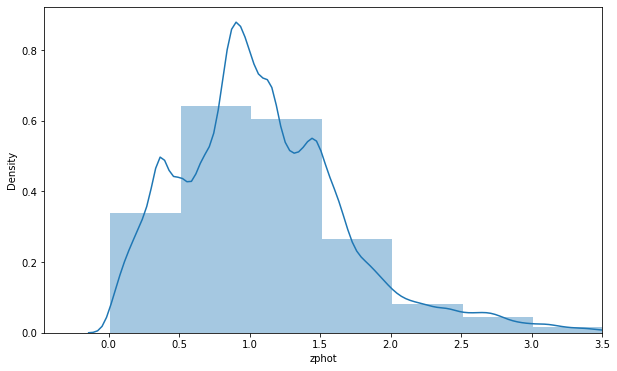

In [18]:
#Plotting distribution for redshift for whole cat-phot ONLY
plt.figure(figsize=(10,6)) 
r = sns.distplot(photo_table['zphot'], bins=12)
r.set_xlim(None,3.5)

(-0.29004500000000005, 3.5)

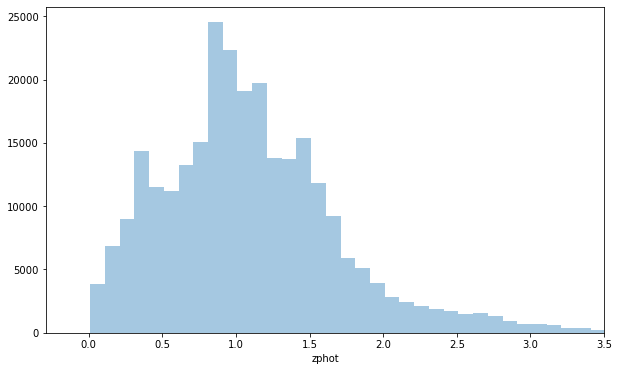

In [19]:
#Plotting distribution for redshift for whole cat-phot ONLY (higher bin count and no kde/values not density)
plt.figure(figsize=(10,6)) 
a = sns.distplot(photo_table['zphot'], bins=60, kde=False)
a.set_xlim(None,3.5)

<AxesSubplot:xlabel='zspec', ylabel='Density'>

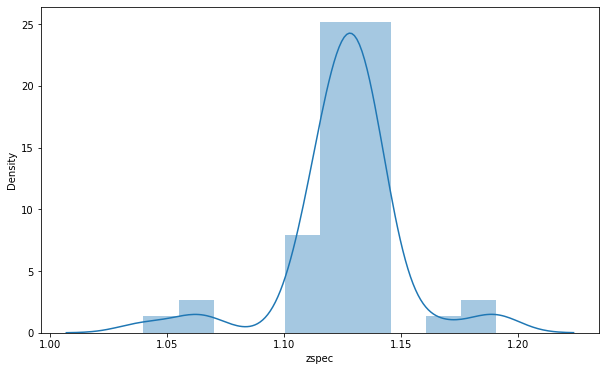

In [20]:
#Histogram of data points within 0.1 of cluster redshift.

#Selecting the values of zspec of 2106, when z=1.126
zspec2106 = combination[combination["zspec"] > 1.026]
zspec2106_edit = zspec2106[zspec2106["zspec"] < 1.226]
#Ensuring the data comes from 2106
zspec2106_graphable = zspec2106_edit.loc[zspec2106_edit["Cluster"] == "SPT2106"]

#Graph
plt.figure(figsize=(10,6)) 
sns.distplot(zspec2106_graphable['zspec'], bins=10)

<AxesSubplot:xlabel='zspec'>

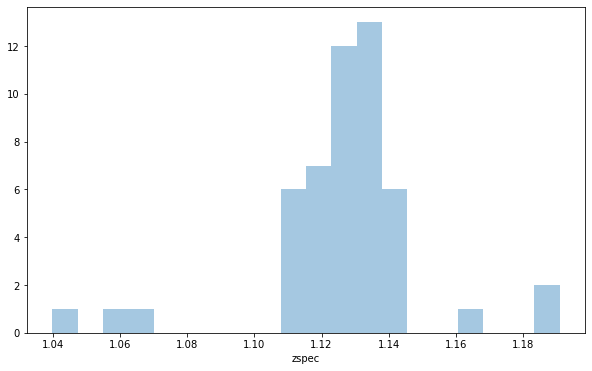

In [21]:
#Graph (more bins and no kde line/values instead of density)
#This is still zspec
plt.figure(figsize=(10,6)) 
sns.distplot(zspec2106_graphable['zspec'], bins=20, kde=False)

<AxesSubplot:xlabel='zphot', ylabel='Density'>

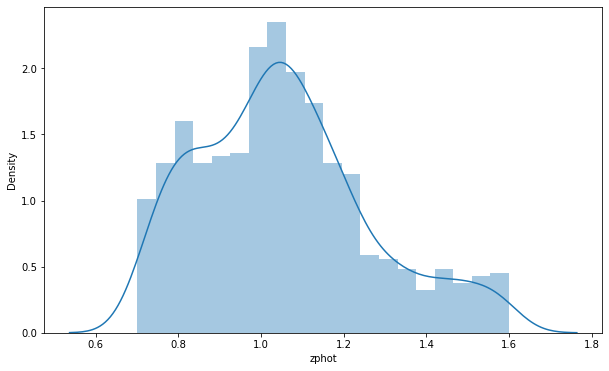

In [22]:
#Histogram for zphot within 0.1 of 2106's redshift

#Selecting the values of zspec of 2106, when z=1.126
#zphot2106 = combination[combination["zphot"] > 1.026]
#zphot2106_edit = zphot2106[zphot2106["zphot"] < 1.226]

#In order to see the peak at of the cluster at 1.126(ish)
#If use the 0.1 data then you do not see the peak at 1.1ish
zphot2106 = combination[combination["zphot"] > 0.7]
zphot2106_edit = zphot2106[zphot2106["zphot"] < 1.6]

#Ensuring the data comes from 2106
zphot2106_graphable = zphot2106_edit.loc[zphot2106_edit["Cluster"] == "SPT2106"]

#Graph
plt.figure(figsize=(10,6)) 
sns.distplot(zphot2106_graphable['zphot'], bins=20)

<AxesSubplot:xlabel='zphot'>

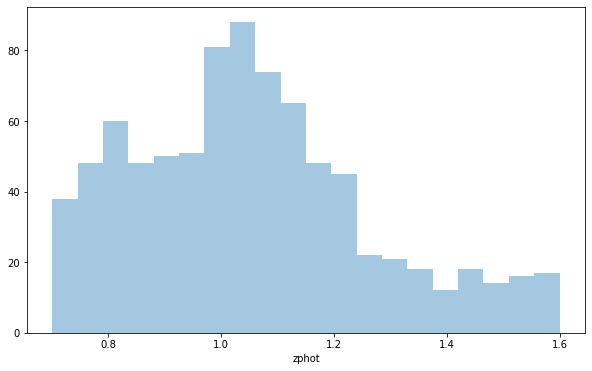

In [23]:
#Graph (more bins and no kde line/values instead of density)
#This is still zphot
plt.figure(figsize=(10,6)) 
sns.distplot(zphot2106_graphable['zphot'], bins=20, kde=False)

These scatterplots (specifically 2106 data) use the data that are within the selected redshift distribution from the scatterplots above.

(0.0, 2.5)

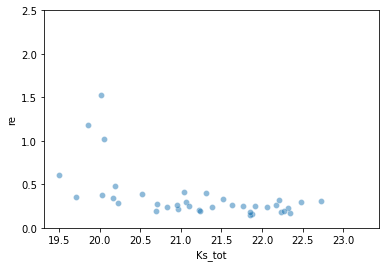

In [24]:
#scatterplot using the zspec data by selecting the data within 0.1 of the cluster and plotting kmag and re data

#This data has not been cleaned, so it still holds unreliable data (clean by selecting for fit flag=3, S/N > 20, redshift quality=3 or 4, etc.)
k = sns.scatterplot(x='Ks_tot', y='re', data=zspec2106_graphable, alpha=0.5)

#Set ylim as 0, as no re can be negative
k.set_ylim(0,2.5)

(0.0, 2.5)

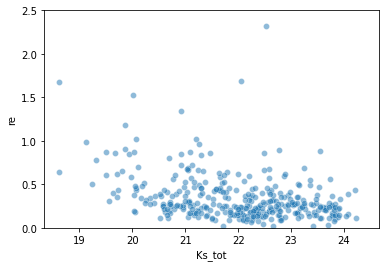

In [25]:
#scatterplot using the zphot data by selecting the data within 0.1 of the cluster and plotting kmag and re data

#This data has not been cleaned, so it still holds unreliable data (clean by selecting for fit flag=3, S/N > 20, redshift quality=3 or 4, etc.)
k = sns.scatterplot(x='Ks_tot', y='re', data=zphot2106_graphable, alpha=0.5)

#Set ylim as 0, as no re can be negative
k.set_ylim(0,2.5)

Histogram of Stellar Mass (in log) 

(0.0, 15.066804940366989)

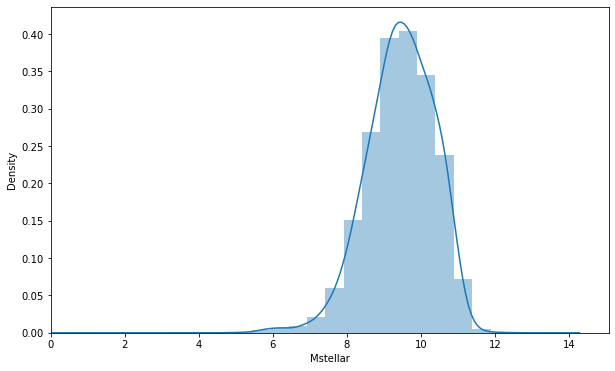

In [26]:
#making a histogram of ALL stellar masses
plt.figure(figsize=(10,6)) 
hh = sns.distplot(combination['Mstellar'], bins=30)

#Bounds set like this because there are negative masses (which isn't possible? so I set it at 0)
hh.set_xlim(0,None)

(0.0, 14.603)

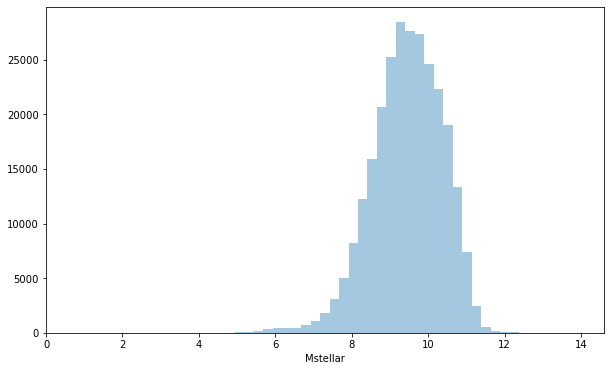

In [27]:
#making a histogram of ALL stellar masses - higher bin count and no kde/change y axis to values
plt.figure(figsize=(10,6)) 
jj = sns.distplot(combination['Mstellar'], bins=60, kde=False)

#Bounds set like this because there are negative masses (which isn't possible? so I set it at 0)
jj.set_xlim(0,None)

Mass/Size relation using the selected redshift data from the above histograms (in 2106 specifically)

(0.0, 2.5)

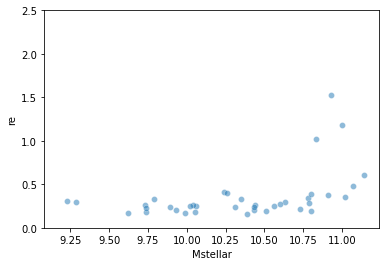

In [28]:
#Plot of Re vs. log(stellar mass) for galaxies with a redshift within 0.1 of the cluster - zspec
oo = sns.scatterplot(x='Mstellar', y='re', data=zspec2106_graphable, alpha=0.5)
oo.set_ylim(0,2.5)

(0.0, 3.5)

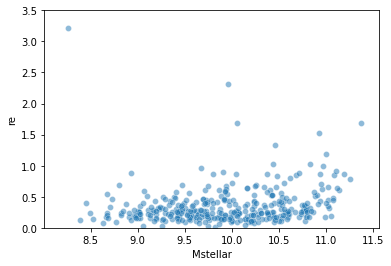

In [29]:
#Plot of Re vs. log(stellar mass) for galaxies with a redshift within 0.1 of the cluster - zphot
ee = sns.scatterplot(x='Mstellar', y='re', data=zphot2106_graphable, alpha=0.5)
ee.set_ylim(0,3.5)

Here is the series of importing the structcats of the other 9 clusters + converting the photcatid into cphotid

In [30]:
#This was my failed attempt to get other cats into pandas using astropy. It did not work so I abanonded it


importing0035 = root + "\DR1\STRUCTCAT_MATCHED\structcat_photmatch_spj0035.dat"
#ascii.read(importing0035)
#f = importing0035.to_pandas()
#f

df = pd.read_table(importing0035)

#df.head(1)
#df['PHOTCATID HSTFOV_flag Fit_flag mag mag_err re re_err n n_err q q_err pa pa_err dist hst_id chi2nu S/N'].str.split(' ', expand=True)
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header
#print(df.columns)
df['# PHOTCATID  HSTFOV_flag  Fit_flag    mag       mag_err     re            re_err          n             n_err         q             q_err         pa            pa_err        dist    hst_id    chi2nu    S/N'].str.split('             ', expand=True)
df

#I have spent like an hour+ trying to get this to work and I am so dearly lost. I had to manually pull this table into excel to fix the column header?
#This still makes me sad and its been like 4 days all this work and it still didn't work

,# PHOTCATID HSTFOV_flag Fit_flag mag mag_err re re_err n n_err q q_err pa pa_err dist hst_id chi2nu S/N
1,1 0 0 -99.0000 -99.0...
2,2 0 0 -99.0000 -99.0...
3,3 0 0 -99.0000 -99.0...
4,4 0 0 -99.0000 -99.0...
5,5 0 0 -99.0000 -99.0...
...,...
4885,4885 0 0 -99.0000 -99.0...
4886,4886 0 0 -99.0000 -99.0...
4887,4887 0 0 -99.0000 -99.0...
4888,4888 1 3 22.5008 0.0...


In [31]:
#Bringing in the rest of the data tables

#reading in spt0205

spt0205_table = pd.read_excel(r"C:\Users\jblan\Documents\College work\Sem 7\Labs\DR1\STRUCTCAT_MATCHED\spt0205.xlsx")

#renaming the column head so I can invoke the replace under same column name
spt0205_table.rename(columns={'PHOTCATID': 'cPHOTID'}, inplace=True)

#changing the value of photcatid to match cphotid
spt0205_table["cPHOTID"] = (spt0205_table["cPHOTID"] + 101000000)

spt0205_table

,cPHOTID,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,101000001,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1,101000002,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2,101000003,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
3,101000004,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
4,101000005,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2432,101002433,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2433,101002434,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2434,101002435,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2435,101002436,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0


In [32]:
#reading in spt0546

spt0546_table = pd.read_excel(r"C:\Users\jblan\Documents\College work\Sem 7\Labs\DR1\STRUCTCAT_MATCHED\spt0546.xlsx")

#renaming the column head so I can invoke the replace under same column name
spt0546_table.rename(columns={'PHOTCATID': 'cPHOTID'}, inplace=True)

#changing the value of photcatid to match cphotid
spt0546_table["cPHOTID"] = (spt0546_table["cPHOTID"] + 102000000)

spt0546_table

,cPHOTID,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,102000001,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.000,-99.0000,-99.0000,-99.0000,-99.000,-99.0000,-99.0000,-99,-99,0.0000
1,102000002,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.000,-99.0000,-99.0000,-99.0000,-99.000,-99.0000,-99.0000,-99,-99,0.0000
2,102000003,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.000,-99.0000,-99.0000,-99.0000,-99.000,-99.0000,-99.0000,-99,-99,0.0000
3,102000004,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.000,-99.0000,-99.0000,-99.0000,-99.000,-99.0000,-99.0000,-99,-99,0.0000
4,102000005,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.000,-99.0000,-99.0000,-99.0000,-99.000,-99.0000,-99.0000,-99,-99,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2088,102002089,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.000,-99.0000,-99.0000,-99.0000,-99.000,-99.0000,-99.0000,-99,-99,0.0000
2089,102002090,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.000,-99.0000,-99.0000,-99.0000,-99.000,-99.0000,-99.0000,-99,-99,0.0000
2090,102002091,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.000,-99.0000,-99.0000,-99.0000,-99.000,-99.0000,-99.0000,-99,-99,0.0000
2091,102002092,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.000,-99.0000,-99.0000,-99.0000,-99.000,-99.0000,-99.0000,-99,-99,0.0000


In [33]:
#reading in spj0035

spj0035_table = pd.read_excel(r"C:\Users\jblan\Documents\College work\Sem 7\Labs\DR1\STRUCTCAT_MATCHED\spj0035.xlsx")

#renaming the column head so I can invoke the replace under same column name
spj0035_table.rename(columns={'PHOTCATID': 'cPHOTID'}, inplace=True)

#changing the value of photcatid to match cphotid
spj0035_table["cPHOTID"] = (spj0035_table["cPHOTID"] + 104000000)

spj0035_table

,cPHOTID,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,104000001,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
1,104000002,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
2,104000003,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
3,104000004,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
4,104000005,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4884,104004885,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
4885,104004886,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
4886,104004887,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
4887,104004888,1,3,22.5008,0.0070,0.167807,0.002921,1.6967,0.0983,0.4898,0.0134,6.7555,1.0812,0.2780,3779,2.9867 17,6.5268


In [34]:
#reading in spj0219

spj0219_table = pd.read_excel(r"C:\Users\jblan\Documents\College work\Sem 7\Labs\DR1\STRUCTCAT_MATCHED\spj0219.xlsx")

#renaming the column head so I can invoke the replace under same column name
spj0219_table.rename(columns={'PHOTCATID': 'cPHOTID'}, inplace=True)

#changing the value of photcatid to match cphotid
spj0219_table["cPHOTID"] = (spj0219_table["cPHOTID"] + 105000000)

spj0219_table

,cPHOTID,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,105000001,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1,105000002,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2,105000003,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
3,105000004,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
4,105000005,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,105001804,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1804,105001805,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1805,105001806,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1806,105001807,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0


In [35]:
#reading in spj0335

spj0335_table = pd.read_excel(r"C:\Users\jblan\Documents\College work\Sem 7\Labs\DR1\STRUCTCAT_MATCHED\spj0335.xlsx")

#renaming the column head so I can invoke the replace under same column name
spj0335_table.rename(columns={'PHOTCATID': 'cPHOTID'}, inplace=True)

#changing the value of photcatid to match cphotid
spj0335_table["cPHOTID"] = (spj0335_table["cPHOTID"] + 106000000)

spj0335_table

,cPHOTID,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,106000001,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1,106000002,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2,106000003,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
3,106000004,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
4,106000005,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,106001696,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1696,106001697,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1697,106001698,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1698,106001699,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0


In [36]:
#reading in spj1034

spj1034_table = pd.read_excel(r"C:\Users\jblan\Documents\College work\Sem 7\Labs\DR1\STRUCTCAT_MATCHED\spj1034.xlsx")

#renaming the column head so I can invoke the replace under same column name
spj1034_table.rename(columns={'PHOTCATID': 'cPHOTID'}, inplace=True)

#changing the value of photcatid to match cphotid
spj1034_table["cPHOTID"] = (spj1034_table["cPHOTID"] + 108000000)

spj1034_table

,cPHOTID,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,108000001,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1,108000002,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2,108000003,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
3,108000004,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
4,108000005,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8855,108008856,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
8856,108008857,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
8857,108008858,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
8858,108008859,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0


In [37]:
#reading in spj1051

spj1051_table = pd.read_excel(r"C:\Users\jblan\Documents\College work\Sem 7\Labs\DR1\STRUCTCAT_MATCHED\spj1051.xlsx")

#renaming the column head so I can invoke the replace under same column name
spj1051_table.rename(columns={'PHOTCATID': 'cPHOTID'}, inplace=True)

#changing the value of photcatid to match cphotid
spj1051_table["cPHOTID"] = (spj1051_table["cPHOTID"] + 109000000)

spj1051_table

,cPHOTID,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,109000001,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1,109000002,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2,109000003,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
3,109000004,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
4,109000005,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10158,109010159,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
10159,109010160,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
10160,109010161,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
10161,109010162,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0


In [38]:
#reading in spj1616

spj1616_table = pd.read_excel(r"C:\Users\jblan\Documents\College work\Sem 7\Labs\DR1\STRUCTCAT_MATCHED\spj1616.xlsx")

#renaming the column head so I can invoke the replace under same column name
spj1616_table.rename(columns={'PHOTCATID': 'cPHOTID'}, inplace=True)

#changing the value of photcatid to match cphotid
spj1616_table["cPHOTID"] = (spj1616_table["cPHOTID"] + 110000000)

spj1616_table

,cPHOTID,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,110000001,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1,110000002,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2,110000003,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
3,110000004,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
4,110000005,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9791,110009792,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
9792,110009793,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
9793,110009794,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
9794,110009795,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0


In [39]:
#reading in spj1634

spj1634_table = pd.read_excel(r"C:\Users\jblan\Documents\College work\Sem 7\Labs\DR1\STRUCTCAT_MATCHED\spj1634.xlsx")

#renaming the column head so I can invoke the replace under same column name
spj1634_table.rename(columns={'PHOTCATID': 'cPHOTID'}, inplace=True)

#changing the value of photcatid to match cphotid
spj1634_table["cPHOTID"] = (spj1634_table["cPHOTID"] + 111000000)

spj1634_table

,cPHOTID,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,111000001,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.000,-99.000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
1,111000002,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.000,-99.000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
2,111000003,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.000,-99.000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
3,111000004,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.000,-99.000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
4,111000005,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.000,-99.000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8883,111008884,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.000,-99.000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
8884,111008885,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.000,-99.000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
8885,111008886,0,0,-99.0000,-99.0000,-99.000000,-99.000000,-99.0000,-99.0000,-99.000,-99.000,-99.0000,-99.0000,-99.0000,-99,-99,0.0000
8886,111008887,1,3,23.9454,0.7289,0.395239,0.160632,0.4292,0.1933,0.291,0.099,47.6535,3.1893,0.2387,2788,0.4567 1,2.1349


In [40]:
#reading in spj1638

spj1638_table = pd.read_excel(r"C:\Users\jblan\Documents\College work\Sem 7\Labs\DR1\STRUCTCAT_MATCHED\spj1638.xlsx")

#renaming the column head so I can invoke the replace under same column name
spj1638_table.rename(columns={'PHOTCATID': 'cPHOTID'}, inplace=True)

#changing the value of photcatid to match cphotid
spj1638_table["cPHOTID"] = (spj1638_table["cPHOTID"] + 112000000)

spj1638_table

,cPHOTID,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,112000001,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1,112000002,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2,112000003,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
3,112000004,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
4,112000005,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10006,112010007,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
10007,112010008,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
10008,112010009,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
10009,112010010,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0


Combining all of the tables above into one table and then combining it with the photo table

In [41]:
#Combing all of the above cats into one table
combination_structcat = pd.concat([spt0205_table, spt0546_table, data2106, spj0035_table, spj0219_table, spj0335_table, spj1034_table, spj1051_table, spj1616_table, spj1634_table, spj1638_table], axis=0)

#Sorting the cphotid in numerical order
combination_structcat = combination_structcat.sort_values("cPHOTID")
combination_structcat

,cPHOTID,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,101000001,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1,101000002,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2,101000003,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
3,101000004,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
4,101000005,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10006,112010007,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
10007,112010008,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
10008,112010009,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
10009,112010010,0,0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0


In [46]:
#combining the photo table and the above table into one
combination_final = pd.merge(photo_table, combination_structcat, how='left', on='cPHOTID')

combination_final

,Cluster,cPHOTID,SPECID,ra,dec,zspec,Redshift_Quality,zphot,zphot_l68,zphot_u68,UMINV,VMINJ,Star,K_flag,totmask,Mstellar,u_tot,g_tot,r_tot,i_tot,z_tot,y_tot,V_tot,B_tot,J_tot,H_tot,K_tot,Ks_tot,IRAC1_tot,IRAC2_tot,IRAC3_tot,IRAC4_tot,IA484_tot,IA527_tot,IA624_tot,IA679_tot,IA738_tot,IA767_tot,IB427_tot,IB464_tot,IB505_tot,IB574_tot,IB709_tot,IB827_tot,fuv_tot,nuv_tot,mips24_tot,eu_tot,eg_tot,er_tot,ei_tot,ez_tot,ey_tot,eV_tot,eB_tot,eJ_tot,eH_tot,eK_tot,eKs_tot,eIRAC1_tot,eIRAC2_tot,eIRAC3_tot,eIRAC4_tot,eIA484_tot,eIA527_tot,eIA624_tot,eIA679_tot,eIA738_tot,eIA767_tot,eIB427_tot,eIB464_tot,eIB505_tot,eIB574_tot,eIB709_tot,eIB827_tot,efuv_tot,enuv_tot,emips24_tot,HSTFOV_flag,Fit_flag,mag,mag_err,re,re_err,n,n_err,q,q_err,pa,pa_err,dist,hst_id,chi2nu,S/N
0,SPT0205,101000254,-1,31.576448,-58.548923,NaN,NaN,0.6916,0.653,0.735,1.631000,1.123000,0.0,0.0,0.0,10.98,5.958668,NaN,66.154896,147.931970,165.775268,NaN,NaN,NaN,267.857604,NaN,NaN,18.177165,NaN,366.660295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.344913,NaN,0.639278,0.975271,2.937707,NaN,NaN,NaN,1.564002,NaN,NaN,1.421279,NaN,1.795926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
1,SPT0205,101000272,-1,31.449797,-58.548134,NaN,NaN,0.2460,0.225,0.268,1.058000,0.518000,0.0,0.0,0.0,9.29,26.485655,NaN,109.153539,137.253523,139.961813,NaN,NaN,NaN,161.805530,NaN,NaN,19.187114,NaN,68.881033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.342971,NaN,0.549937,0.697769,2.105134,NaN,NaN,NaN,1.581807,NaN,NaN,1.425104,NaN,4.807510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
2,SPT0205,101000286,-1,31.382263,-58.548920,NaN,NaN,1.1126,1.055,1.172,1.959000,1.431000,0.0,0.0,0.0,10.85,0.347850,NaN,2.346008,7.043954,11.977094,NaN,NaN,NaN,29.401196,NaN,NaN,20.250873,NaN,89.288643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.229265,NaN,0.365637,0.466435,1.403257,NaN,NaN,NaN,1.047502,NaN,NaN,0.950657,NaN,1.308389,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
3,SPT0205,101000290,-1,31.419193,-58.548588,NaN,NaN,0.5563,0.518,0.604,1.838000,1.000000,0.0,0.0,0.0,9.71,0.186325,NaN,7.973411,15.262561,18.372256,NaN,NaN,NaN,25.104038,NaN,NaN,20.902405,NaN,21.584750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.186325,NaN,0.387106,0.379074,1.142042,NaN,NaN,NaN,0.851311,NaN,NaN,0.774211,NaN,2.001384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
4,SPT0205,101000293,-1,31.528271,-58.548615,NaN,NaN,0.7379,0.664,0.804,1.746000,1.177000,0.0,0.0,0.0,10.43,1.380357,NaN,9.289432,25.285337,35.018064,NaN,NaN,NaN,48.905029,NaN,NaN,19.984455,NaN,58.054011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.254565,NaN,0.405987,0.721999,2.172582,NaN,NaN,NaN,1.781956,NaN,NaN,1.235519,NaN,0.906340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99,-99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274987,SpARCS1613,219005807,-1,243.386673,56.895893,NaN,NaN,1.7280,1.348,2.167,1.354987,1.786097,0.0,0.0,0.0,10.76,0.045614,0.176507,0.251870,0.620750,-0.051564,NaN,NaN,NaN,1.705576,NaN,NaN,22.339979,28.556497,31.360781,14.281223,2.177584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

The scatterplot of mass/size of the 10 clusters

(0.0, 13.175)

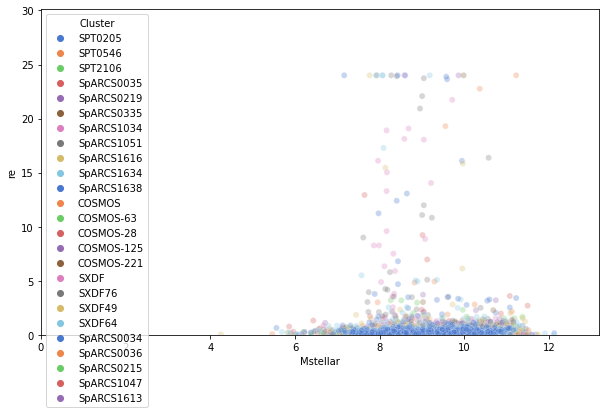

In [43]:
#The unasked for full catalog scatterplot of re vs mstellar. The data has been untampered with

#Whole cat mstellar vs re
plt.figure(figsize=(10,6))
qq = sns.scatterplot(x='Mstellar', y='re', data=combination_final, alpha=0.3, hue='Cluster', palette="muted")

#Neither re nor Mstellar can be negative
qq.set_ylim(0,None)
qq.set_xlim(0,None)

(0.0, 13.175)

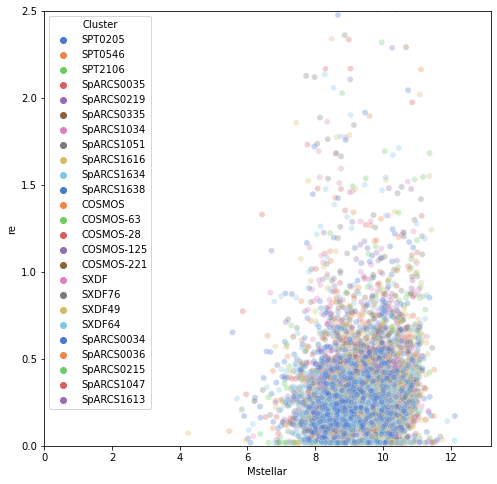

In [44]:
#The unasked for full catalog scatterplot of re vs mstellar. The data has been untampered with

#Whole cat mstellar vs re
plt.figure(figsize=(8,8))
qq = sns.scatterplot(x='Mstellar', y='re', data=combination_final, alpha=0.3, hue='Cluster', palette="muted")

#Neither re nor Mstellar can be negative. I am setting x and y lims in order to hopefully exclude some of the stars!
qq.set_ylim(0,2.5)
qq.set_xlim(0,None)

<Figure size 720x432 with 0 Axes>

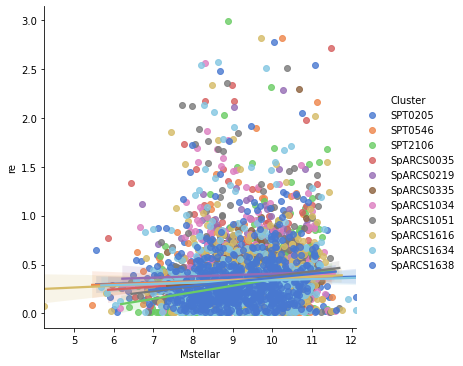

In [45]:
#Whole cat mstellar vs re
#This time I am using lmplot in order to get a line of best fit.

#I am selecting for data in order to hopefully exclude stars
#I am so sorry for how bad these data frames are labeled 
combination_final_edit = combination_final[combination_final["Mstellar"] > 0]
combination_final_edit2 = combination_final_edit[combination_final_edit["re"] < 3]
combination_final_graphable = combination_final_edit2[combination_final_edit2["re"] > 0]

plt.figure(figsize=(10,6))
sns.lmplot(x='Mstellar', y='re', hue='Cluster', palette="muted", data=combination_final_graphable)